In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv')
df.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [3]:
df.shape

(7043, 18)

In [4]:
traducao_dict = {'Sim':1, 'Nao':0}

dadosmodificados = df[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dict)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [5]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(df.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))

dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [6]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [7]:
pd.set_option('display.max_columns', 39)

In [8]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [9]:
#verificando balanceamento das classes
import seaborn as sns
%matplotlib inline

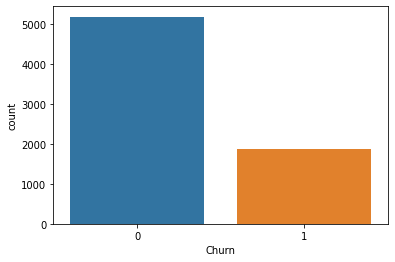

In [11]:
ax = sns.countplot(x='Churn', data=dados_final)

In [12]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 4.9 MB/s 
     |████████████████████████████████| 199 kB 55.8 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [13]:
x = dados_final.drop('Churn', axis =1)
y = dados_final['Churn']


In [15]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)
x,y = smt.fit_resample(x, y)

In [17]:
y

0        0
1        0
2        1
3        0
4        1
        ..
10343    1
10344    1
10345    1
10346    1
10347    1
Name: Churn, Length: 10348, dtype: int64

In [18]:
dados_final = pd.concat([x,y], axis=1)

dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


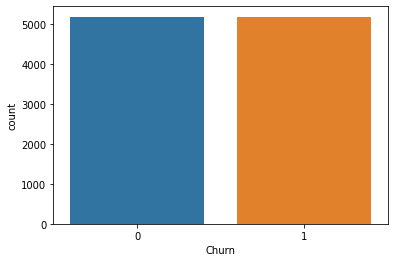

In [19]:
ax = sns.countplot(x='Churn', data=dados_final)

In [20]:
#dividindo em X e y

X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

In [21]:
# Padronizando os dados 
from sklearn.preprocessing import StandardScaler

In [22]:
norm = StandardScaler()

X_norm = norm.fit_transform(X)
X_norm

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

In [23]:
X_norm[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.8149851 , -0.41334384,
       -1.10768354, -1.32176205, -0.88482108,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
       -0.44617598, -0.64211419,  0.87997069, -0.44617598, -0.52426638,
        1.18643645, -0.44617598, -0.77707385,  1.2033586 , -0.44617598,
       -0.78992399, -0.44648735,  0.73773107, -0.41989297, -0.42576817,
        1.30292044, -0.47943196, -0.43617215])

In [24]:
Xmaria = X_norm[-1]


$$ \sqrt{\sum_{i=1}^{n}(a_i - b_i)^2} $$

In [25]:
import numpy as np

In [26]:
#calculando a distancia euclidiana do primeiro vetor com o vetor "Xmaria"
a = Xmaria
b = X_norm[0]

In [27]:
np.sqrt(np.sum(np.square(a-b)))

7.038167365627291

In [28]:
#separar treino e teste
from sklearn.model_selection import train_test_split

In [29]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_norm, y, test_size=0.3, random_state=123)

In [34]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [30]:
# gerar modelo KNN
from sklearn.neighbors import KNeighborsClassifier

In [36]:
#instanciando a classe do KNN
knn = KNeighborsClassifier(metric='euclidean')

In [37]:
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [38]:
predicao_knn = knn.predict(X_teste)

In [39]:
predicao_knn

array([1, 0, 0, ..., 0, 1, 1])

In [40]:
#verificando a acurácia do modelo
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
accuracy_score(y_teste, predicao_knn)

0.8148148148148148

In [42]:
confusion_matrix(y_teste, predicao_knn)

array([[1241,  328],
       [ 247, 1289]])

# Utilizando Naive Bayes

In [43]:
X_treino

array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215]])

In [44]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [45]:
# carergando a classe BernoulliNB
from sklearn.naive_bayes import BernoulliNB

In [46]:
np.median(X_treino)

-0.4461759755508453

In [50]:
#instanciando a classe
bnb = BernoulliNB(binarize=-0.44)

In [51]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=-0.44)

In [52]:
predicao_bnb = bnb.predict(X_teste)

In [53]:
predicao_bnb

array([1, 0, 0, ..., 1, 1, 1])

In [54]:
accuracy_score(y_teste, predicao_bnb)

0.7549114331723027

In [55]:
confusion_matrix(y_teste, predicao_bnb)

array([[1050,  519],
       [ 242, 1294]])

# Árvores de decisão

In [56]:
X_treino

array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215]])

In [57]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [58]:
#importando classe DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [63]:
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [64]:
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01987306, 0.01892071,
       0.16274644, 0.22207834, 0.00929414, 0.00344576, 0.01033768,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048744,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.01760111,
       0.02127213, 0.02182911, 0.01980513])

In [65]:
predicao_arvore = dtc.predict(X_teste)

In [66]:
predicao_arvore

array([0, 0, 0, ..., 1, 1, 1])

In [67]:
accuracy_score(y_teste, predicao_arvore)

0.8077294685990338

In [68]:
confusion_matrix(y_teste, predicao_arvore)

array([[1249,  320],
       [ 277, 1259]])

# Verificando o melhor modelo

## Acurácia

In [69]:
print(f'Acurácia para o modelo KNN: {accuracy_score(y_teste, predicao_knn)}\n\
Acurácia para o modelo Naive Bayes: {accuracy_score(y_teste, predicao_bnb)}\n\
Acurácia para o modelo Decision Tree: {accuracy_score(y_teste, predicao_arvore)}')

Acurácia para o modelo KNN: 0.8148148148148148
Acurácia para o modelo Naive Bayes: 0.7549114331723027
Acurácia para o modelo Decision Tree: 0.8077294685990338


## Matriz de confusão


In [70]:
# KNN
confusion_matrix(y_teste, predicao_knn)

array([[1241,  328],
       [ 247, 1289]])

In [71]:
# Naive Bayes
confusion_matrix(y_teste, predicao_bnb)

array([[1050,  519],
       [ 242, 1294]])

In [72]:
# Decision Tree
confusion_matrix(y_teste, predicao_arvore)

array([[1249,  320],
       [ 277, 1259]])

## Precisão

In [73]:
from sklearn.metrics import precision_score

In [74]:
# KNN
precision_score(y_teste, predicao_knn)

0.7971552257266543

In [75]:
# Naive Bayes
precision_score(y_teste, predicao_bnb)

0.7137341423055709

In [76]:
# Decision Tree
precision_score(y_teste, predicao_arvore)

0.7973400886637112

## Recall

In [77]:
from sklearn.metrics import recall_score

In [78]:
# KNN
recall_score(y_teste, predicao_knn)

0.8391927083333334

In [79]:
# Naive Bayes
recall_score(y_teste, predicao_bnb)

0.8424479166666666

In [80]:
# Decision Tree
recall_score(y_teste, predicao_arvore)

0.8196614583333334